Profiling

In [ ]:
import pandas as pd
import numpy as np
import re
import os

In [30]:
# Define your path and file name
PATH = 'C:/Users/bea.black/PsychiatryUK/cleansed'
FILE_NAME = 'rsi_data_merged.csv' # rsi_data_merged.csv, agg_reference_merged.csv, cleaned_contents.csv, cleaned_notes.csv, cleaned_table_5_data.csv, cleaned_table_6_data.csv
full_path = os.path.join(PATH, FILE_NAME)

In [31]:
# Read the CSV file
df = pd.read_csv(full_path, parse_dates=True, engine='python', sep=',', quotechar='"', on_bad_lines='skip')

print("Top 5 rows:")
print(df.head())

Top 5 rows:
  sheet_name                      table_name      date frequency  value  \
0       CPSA  Index number of sales per week  1988 Jan   monthly   28.4   
1       CPSA  Index number of sales per week  1988 Jan   monthly   25.2   
2       CPSA  Index number of sales per week  1988 Jan   monthly   36.0   
3       CPSA  Index number of sales per week  1988 Jan   monthly   31.8   
4       CPSA  Index number of sales per week  1988 Jan   monthly   35.1   

  agg_sic_code dataset_code  year month_name  month  
0      AGG 21X         J468  1988        Jan      1  
1        AGG 1         EAQW  1988        Jan      1  
2       AGG 12         EAQY  1988        Jan      1  
3        47.19         WAQX  1988        Jan      1  
4        AGG 5         EARA  1988        Jan      1  


In [32]:
# Simple Structure (No. Rows/Cols)
nrows, ncols = df.shape
print(f'nrows = {nrows:,}')
print(f'ncols = {ncols:,}')

nrows = 298,289
ncols = 10


In [ ]:
# Check For Null Data
summary = pd.DataFrame(df.isnull().sum(), columns = ['Count of null values'])
summary['Count of non-null values'] = (~df.isnull()).sum()
summary['Data Type'] =df.dtypes
summary['Count of unique values'] = df.nunique()
summary['Potential PK'] = summary.apply(lambda x: True
                                             if (x['Count of unique values'] == x['Count of non-null values']) & 
                                                (x['Count of unique values'] != 0)  
                                                else False,
                                                axis = 1)


measurer = np.vectorize(len)
df_object = df.select_dtypes(include=[object])
df_dict = dict(zip(df_object, measurer(df_object.values.astype(str)).max(axis=0)))
df_lengths = pd.DataFrame(list(df_dict.items()))
df_lengths.columns=["Column","Max String Length (objects)"]
df_lengths.set_index("Column", inplace=True)
summary = pd.concat([summary, df_lengths], axis=1)

summary

,Count of null values,Count of non-null values,Data Type,Count of unique values,Potential PK,Max String Length (objects)
sheet_name,0,298289,object,26,False,10.0
table_name,1157,297132,object,10,False,107.0
date,0,298289,object,1750,False,8.0
frequency,0,298289,object,3,False,9.0
value,0,298289,float64,4812,False,NaN
agg_sic_code,1157,297132,object,54,False,8.0
dataset_code,0,298289,object,420,False,4.0
year,0,298289,int64,226,False,NaN
month_name,59035,239254,object,24,False,3.0
month,0,298289,int64,13,False,NaN


In [34]:
# Proportion of row duplicates
duplicates = df.duplicated().sum() # by default, it considers all columns
total = len(df.index)
print("Total No. Duplicate Rows is: " + str(duplicates) + " / " + str(total) + " (" + "{:.0%}".format(duplicates/total) + ")")
df.loc[df.duplicated(), :]

Total No. Duplicate Rows is: 0 / 298289 (0%)


,sheet_name,table_name,date,frequency,value,agg_sic_code,dataset_code,year,month_name,month


In [35]:
# Ensure the DataFrame’s index is unique 
df.index.duplicated().sum()

0

Analysis & Visualization

Metric

In [ ]:
# Real Retail Growth (YoY %) by Household goods stores
# Real change is calculated by removing the effect of price changes from the value change. 
# This is done by subtracting the implied deflator (price growth) from nominal growth.
# 
# Real growth (%) = Nominal growth (%)  – Price growth (Implied Inflation) (%)

# CPSA 1 - Retail sales index: value seasonally adjusted percentage change on same month a year earlier, 
# Percentage change on same month a year earlier
# Table ID1 - Implied price deflator - non-seasonally adjusted Year on year percentage change

# Check data

# Load CSV file
csv_path = 'cleansed/rsi_data_merged.csv'
agg_path = 'cleansed/agg_reference_merged.csv'

df = pd.read_csv(csv_path)

# Create df for IDIL from CPSA1 (nominal growth) and A4VN from Table ID1 (Inflation)

n_growth = df[
    (df['sheet_name'] == 'CPSA1') &
    (df["dataset_code"].str.upper() == "IDIL") &
    (df["table_name"] == "Percentage change on same month a year earlier") &
    (df['agg_sic_code'].str.upper().str.contains('AGG7')) &
    (df['year'].between(2020, 2024))
]
print(n_growth.head(5))

p_growth = df[
    (df['sheet_name'] == 'Table ID1') &
    (df["dataset_code"].str.upper() == "A4VN") &
    (df['agg_sic_code'].str.upper().str.contains('AGG7')) & 
    (df['year'].between(2000, 2024))
]
print(p_growth.head(5))

n_growth.to_csv('n_growth.csv')
p_growth.to_csv('p_growth.csv')

      sheet_name                                      table_name      date  \
12032      CPSA1  Percentage change on same month a year earlier  2020 Jan   
12042      CPSA1  Percentage change on same month a year earlier  2020 Feb   
12052      CPSA1  Percentage change on same month a year earlier  2020 Mar   
12062      CPSA1  Percentage change on same month a year earlier  2020 Apr   
12072      CPSA1  Percentage change on same month a year earlier  2020 May   

      frequency  value agg_sic_code dataset_code  year month_name  month  
12032   monthly   -0.7         AGG7         IDIL  2020        Jan      1  
12042   monthly    1.1         AGG7         IDIL  2020        Feb      2  
12052   monthly  -11.1         AGG7         IDIL  2020        Mar      3  
12062   monthly  -51.5         AGG7         IDIL  2020        Apr      4  
12072   monthly  -31.3         AGG7         IDIL  2020        May      5  
      sheet_name                                         table_name      date  \


In [ ]:
# Load CSV file
csv_path = 'cleansed/rsi_data_merged.csv'

df = pd.read_csv(csv_path)

# Create df for IDIL from CPSA1 (nominal growth) and A4VN from Table ID1 (inflation)

n_growth = df[
    (df['sheet_name'] == 'CPSA1') &
    (df["dataset_code"].str.upper() == "IDIL") &
    (df["table_name"] == "Percentage change on same month a year earlier") &
    (df['agg_sic_code'].str.upper().str.contains('AGG7')) &
    (df['year'].between(2020, 2024))
]

p_growth = df[
    (df['sheet_name'] == 'Table ID1') &
    (df["dataset_code"].str.upper() == "A4VN") &
    (df['agg_sic_code'].str.upper().str.contains('AGG7')) & 
    (df['year'].between(2000, 2024))
]

# Merge datasets on year + month + agg_sic_code
merged = pd.merge(
    n_growth[['year', 'month', 'agg_sic_code', 'value']].rename(columns={'value': 'nominal_growth'}),
    p_growth[['year', 'month', 'agg_sic_code', 'value']].rename(columns={'value': 'price_growth'}),
    on=['year', 'month', 'agg_sic_code'],
    how='inner'
)

# Calculate Real Growth
merged['real_growth'] = merged['nominal_growth'] - merged['price_growth']

# Optional: convert to datetime for plotting
merged['date'] = pd.to_datetime(merged['year'].astype(str) + "-" + merged['month'].astype(str).str.zfill(2))

# Sort by date
merged = merged.sort_values('date')

print(merged[['date', 'nominal_growth', 'price_growth', 'real_growth']].head())

merged.to_csv('real_growth.csv')

        date  nominal_growth  price_growth  real_growth
0 2020-01-01            -0.7           0.1         -0.8
1 2020-02-01             1.1          -1.1          2.2
2 2020-03-01           -11.1          -0.8        -10.3
3 2020-04-01           -51.5          -0.9        -50.6
4 2020-05-01           -31.3          -1.4        -29.9


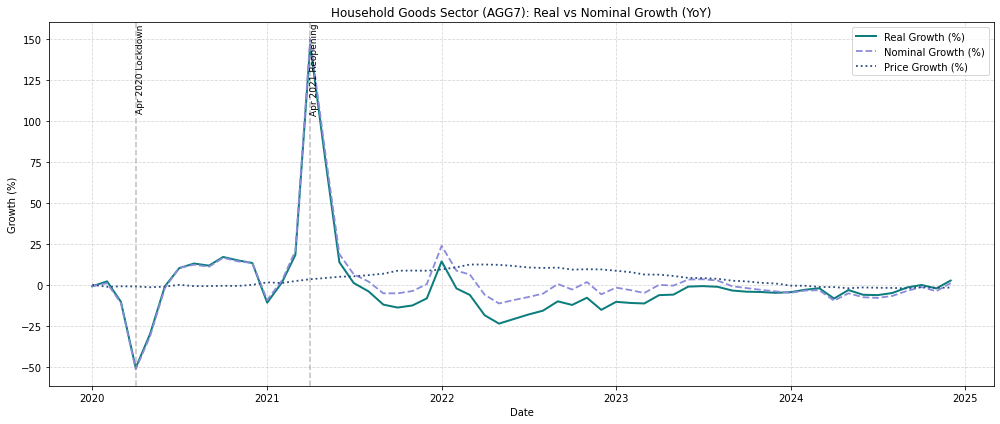

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV and fix the date column
df = pd.read_csv("real_growth.csv")
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date'])  # remove bad rows
df = df.dropna(subset=['real_growth', 'nominal_growth', 'price_growth'])  # extra safety

# Extract arrays for plotting
x = df['date'].values
y_real = df['real_growth'].values
y_nominal = df['nominal_growth'].values
y_price = df['price_growth'].values

# Plot
plt.figure(figsize=(14, 6))
plt.plot(x, y_real, label='Real Growth (%)', color='#0c7c7c', linewidth=2)
plt.plot(x, y_nominal, label='Nominal Growth (%)', linestyle='--', color='#8b8bdc', linewidth=1.8)
plt.plot(x, y_price, label='Price Growth (%)', linestyle=':', color='#294c7e', linewidth=1.8)

# Annotations
for label_date, label_text in [('2020-04-01', 'Apr 2020 Lockdown'), ('2021-04-01', 'Apr 2021 Reopening')]:
    date_obj = pd.to_datetime(label_date)
    plt.axvline(date_obj, color='gray', linestyle='--', alpha=0.5)
    plt.text(date_obj, max(y_real) * 0.9, label_text, rotation=90, verticalalignment='center', fontsize=9, color='black')

# Styling
plt.title("Household Goods Sector (AGG7): Real vs Nominal Growth (YoY)")
plt.xlabel("Date")
plt.ylabel("Growth (%)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Visualisation

In [ ]:
# Check data

# Load CSV file
csv_path = 'cleansed/rsi_data_merged.csv'
agg_path = 'cleansed/agg_reference_merged.csv'

df = pd.read_csv(csv_path)

# Create df for Small and Large Businesses
s_business = df[
    (df['sheet_name'] == 'Table 4 A') &
    (df['table_name'] == 'Index number of sales per week') &
    (df["dataset_code"].str.upper() == "J5AJ") &
    (df['agg_sic_code'].str.upper().str.contains('AGG21-SB')) &
    (df['year'].between(2000, 2024))
]
print(s_business.head(5))

l_business = df[
    (df['sheet_name'] == 'Table 4 A') &
    (df['table_name'] == 'Index number of sales per week') &
    (df["dataset_code"].str.upper() == "J5AI") &
    (df['agg_sic_code'].str.upper().str.contains('AGG21-LB')) & 
    (df['year'].between(2000, 2024))
]
print(l_business.head(5))

       sheet_name                      table_name  date frequency  value  \
238577  Table 4 A  Index number of sales per week  2000    annual   64.5   
238578  Table 4 A  Index number of sales per week  2001    annual   65.2   
238579  Table 4 A  Index number of sales per week  2002    annual   66.2   
238580  Table 4 A  Index number of sales per week  2003    annual   63.9   
238581  Table 4 A  Index number of sales per week  2004    annual   66.1   

       agg_sic_code dataset_code  year month_name  month  
238577     AGG21-SB         J5AJ  2000        NaN      0  
238578     AGG21-SB         J5AJ  2001        NaN      0  
238579     AGG21-SB         J5AJ  2002        NaN      0  
238580     AGG21-SB         J5AJ  2003        NaN      0  
238581     AGG21-SB         J5AJ  2004        NaN      0  
       sheet_name                      table_name  date frequency  value  \
238548  Table 4 A  Index number of sales per week  2000    annual   43.5   
238549  Table 4 A  Index number of sa

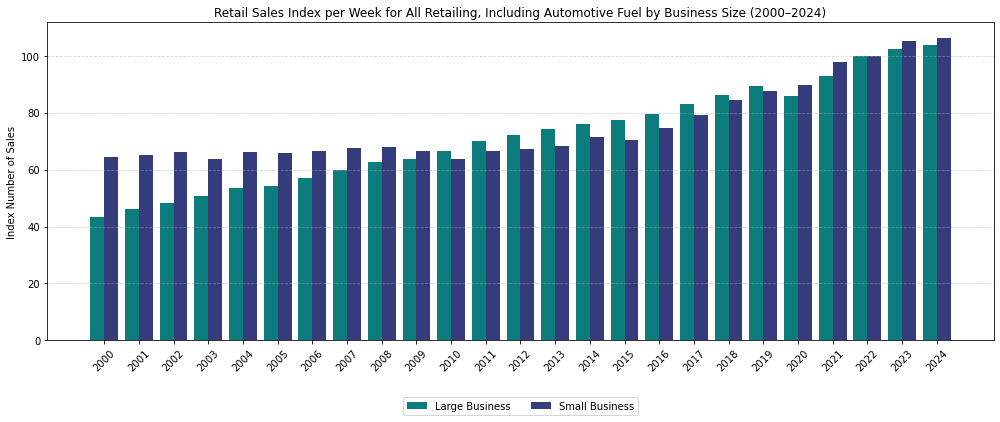

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
csv_path = 'cleansed/rsi_data_merged.csv'
agg_path = 'cleansed/agg_reference_merged.csv'

df = pd.read_csv(csv_path)
agg_ref = pd.read_csv(agg_path)

# Filter Small Businesses
s_business = df[
    (df['sheet_name'] == 'Table 4 A') &
    (df['table_name'] == 'Index number of sales per week') &
    (df["dataset_code"].str.upper() == "J5AJ") &
    (df['agg_sic_code'].str.upper().str.contains('AGG21-SB')) &
    (df['year'].between(2000, 2024))
][['year', 'agg_sic_code', 'value']].rename(columns={'value': 'Small Business'})

# Filter Large Businesses
l_business = df[
    (df['sheet_name'] == 'Table 4 A') &
    (df['table_name'] == 'Index number of sales per week') &
    (df["dataset_code"].str.upper() == "J5AI") &
    (df['agg_sic_code'].str.upper().str.contains('AGG21-LB')) &
    (df['year'].between(2000, 2024))
][['year', 'agg_sic_code', 'value']].rename(columns={'value': 'Large Business'})

# Merge time_period_description from agg_reference
agg_lookup = agg_ref[['agg_sic_code', 'time_period_description']].drop_duplicates()

s_business = s_business.merge(agg_lookup, on='agg_sic_code', how='left')
l_business = l_business.merge(agg_lookup, on='agg_sic_code', how='left')

# Combine Small and Large Business on year
merged = pd.merge(s_business[['year', 'Small Business']], 
                  l_business[['year', 'Large Business']], 
                  on='year', how='inner')

# Plotting
plt.figure(figsize=(14, 6))
bar_width = 0.4
x = merged['year']
x_indexes = range(len(x))

plt.bar([i - bar_width/2 for i in x_indexes], merged['Large Business'], 
        width=bar_width, label='Large Business', color='#0c7c7c')
plt.bar([i + bar_width/2 for i in x_indexes], merged['Small Business'], 
        width=bar_width, label='Small Business', color='#343c7c')

#plt.xlabel("Year")
plt.ylabel("Index Number of Sales")
plt.title("Retail Sales Index per Week for All Retailing, Including Automotive Fuel by Business Size (2000–2024)")
plt.xticks(ticks=x_indexes, labels=merged['year'], rotation=45)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=2)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Error Handling & Anomalies

In [ ]:
# Z-Score Method - standard deviation to flag values that are unusually high or low

import pandas as pd

# Load your data
df = pd.read_csv("real_growth.csv")
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date', 'real_growth'])  # Clean up

# Optional: sort just to be safe
df = df.sort_values('date')

In [ ]:
mean = df['real_growth'].mean()
std = df['real_growth'].std()

# Compute z-score
df['z_score'] = (df['real_growth'] - mean) / std

# Flag anomalies (e.g., z > 2.5 or < -2.5)
threshold = 2.5
df['is_anomaly'] = df['z_score'].abs() > threshold

anomalies = df[df['is_anomaly']]

print("\n🔍 Anomalies in Real Retail Growth (Z-Score > ±2.5):")
print(anomalies[['date', 'real_growth', 'z_score']].sort_values(by='z_score', key=abs, ascending=False))

# potenriaally add expanation column to filter out certain events


🔍 Anomalies in Real Retail Growth (Z-Score > ±2.5):
         date  real_growth   z_score
15 2021-04-01        146.8  5.874693
16 2021-05-01         80.0  3.215747


In [ ]:
# Other Index number of sales per week data INOSPW - Z-Score Method

import pandas as pd

# Load and clean data
df = pd.read_csv("cleansed/rsi_data_merged.csv")
df = df.dropna(subset=['year', 'dataset_code', 'table_code', 'value', 'frequency'])
df = df[df['table_code'] == 'INOSPW']
df = df[~df['frequency'].str.lower().str.contains('quarter')]  # Exclude quarterly

# Handle date column
def generate_date(row):
    try:
        if row['frequency'].lower() == 'monthly':
            return pd.to_datetime(f"{int(row['year'])}-{int(row['month']):02}")
        elif row['frequency'].lower() == 'annual':
            return pd.to_datetime(f"{int(row['year'])}-01")  # use Jan as placeholder
    except:
        return pd.NaT

df['date'] = df.apply(generate_date, axis=1)
df = df.dropna(subset=['date'])

# Z-score calculation by dataset_code
results = []

for code, group in df.groupby('dataset_code'):
    group = group.sort_values('date')
    mean = group['value'].mean()
    std = group['value'].std()
    
    group['z_score'] = (group['value'] - mean) / std
    group['is_anomaly'] = group['z_score'].abs() > 2.5
    anomalies = group[group['is_anomaly']]

    if not anomalies.empty:
        results.append(anomalies[['dataset_code', 'frequency', 'date', 'value', 'z_score']])

# Combine and display results
if results:
    anomalies_df = pd.concat(results)
    print("\n🔍 Z-Score Anomalies (|Z| > 2.5) by Frequency:")
    print(anomalies_df.sort_values(by='z_score', key=abs, ascending=False))
else:
    print("✅ No anomalies found above Z-score threshold.")

anomalies_df.to_csv('anomalies_df.csv')


🔍 Z-Score Anomalies (|Z| > 2.5) by Frequency:
       dataset_code frequency       date  value   z_score
45665          JO5A   monthly 2020-04-01   43.1 -6.335617
112744         JO5A   monthly 2020-04-01   43.1 -6.335617
209238         J43V   monthly 2020-04-01   43.5 -6.050707
258015         EAPG   monthly 2022-12-01  184.1  5.881531
153974         JO2W   monthly 2022-03-01  170.4  5.601111
...             ...       ...        ...    ...       ...
255778         EAGF   monthly 2021-12-01  141.2  2.501624
265820         JJ8J   monthly 2005-11-01  196.7  2.501541
153481         JO2X   monthly 2020-12-01  114.2  2.501010
254888         EAGN   monthly 2021-12-01  107.0  2.500407
254898         EAGN   monthly 2022-10-01  107.0  2.500407

[1058 rows x 5 columns]


In [ ]:
# Threshold-Based Spike Detection - manually flag anything over a set threshold (based on domain knowledge)

import pandas as pd

# Load and prep data
df = pd.read_csv("real_growth.csv")
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date', 'real_growth'])
df = df.sort_values('date')

# Calculate Month-on-Month change in real growth
df['real_growth_mom_change'] = df['real_growth'].diff()

# Apply threshold (e.g., ±20%)
threshold = 20  # You can adjust this based on context
df['is_spike'] = df['real_growth_mom_change'].abs() > threshold

# View flagged results
spikes = df[df['is_spike']]

print("\n🚨 Spike Detection Results (Month-on-Month real growth change > ±20%)")
print(spikes[['date', 'real_growth', 'real_growth_mom_change']].sort_values(by='real_growth_mom_change', key=abs, ascending=False))

# potentially consider using base value to filter out noise, combine with rolling average, add expanation column


🚨 Spike Detection Results (Month-on-Month real growth change > ±20%)
         date  real_growth  real_growth_mom_change
15 2021-04-01        146.8                   128.4
16 2021-05-01         80.0                   -66.8
17 2021-06-01         13.9                   -66.1
3  2020-04-01        -50.6                   -40.3
5  2020-06-01         -0.8                    29.1
12 2021-01-01        -10.8                   -24.2
24 2022-01-01         14.4                    22.6
4  2020-05-01        -29.9                    20.7


In [2]:
# Rolling Mean Deviation - comapre each month to a rolling average

import pandas as pd

# Load and prepare data
df = pd.read_csv("real_growth.csv")
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date', 'real_growth'])
df = df.sort_values('date')

# Calculate 3-month rolling average (centered)
df['rolling_avg'] = df['real_growth'].rolling(window=3, center=True).mean()

# Calculate absolute deviation from the rolling average
df['rolling_deviation'] = (df['real_growth'] - df['rolling_avg']).abs()

# Define a threshold for "unusual" deviation (e.g. ±15%)
threshold = 15
df['rolling_anomaly'] = df['rolling_deviation'] > threshold

# Extract anomalies
rolling_anomalies = df[df['rolling_anomaly']]

# Display the flagged anomalies
print("\n📊 Rolling Mean Deviation Anomalies (Deviation > ±15%):")
print(rolling_anomalies[['date', 'real_growth', 'rolling_avg', 'rolling_deviation']])


📊 Rolling Mean Deviation Anomalies (Deviation > ±15%):
         date  real_growth  rolling_avg  rolling_deviation
3  2020-04-01        -50.6   -30.266667          20.333333
14 2021-03-01         18.4    55.600000          37.200000
15 2021-04-01        146.8    81.733333          65.066667
17 2021-06-01         13.9    31.700000          17.800000
